# FlexRiLoG - Rigid and Flexible Labelings of Graphs

## Basic notions

**Definition**

Let $G=(V_G,E_G)$ be a graph with an edge labeling $\lambda:E_G\rightarrow \mathbb{R}_+$.

A realization $\rho:V_G\rightarrow\mathbb{R}^2$ is called *compatible* with $\lambda$ if
$||\rho(u)-\rho(v)||=\lambda(uv)$ for all $uv\in E_G$.

The labeling $\lambda$ is called

- *(proper) flexible* if the number of (injective) realizations of $G$ compatible with $\lambda$ is infinite,
- *rigid* if the number of realizations of $G$ compatible with $\lambda$ is finite and positive,

where the counting is up to direct Euclidean isometries.
A graph is called *movable* iff it has a proper flexible labeling.

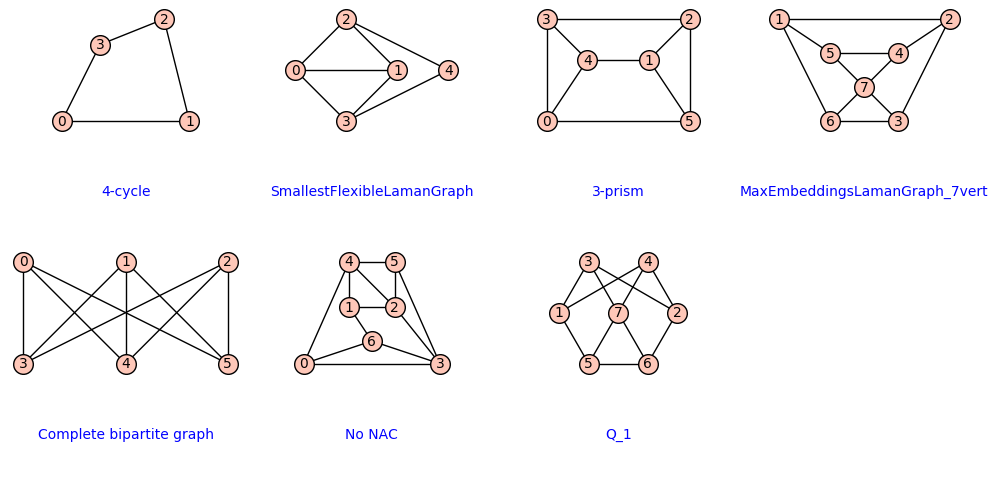

In [7]:
from flexrilog.graph_generator import GraphGenerator
from flexrilog.flexible_rigid_graph import FlexRiGraph
C4 = FlexRiGraph([[0,1],[1,2],[2,3],[0,3]], name='4-cycle', pos={0:(0,0),1:(1,0), 2:(0.8,0.8), 3:(0.3,0.6)})
S = GraphGenerator.SmallestFlexibleLamanGraph()
T = GraphGenerator.ThreePrismGraph()
M = GraphGenerator.MaxEmbeddingsLamanGraph(7)
K33 = FlexRiGraph(graphs.CompleteBipartiteGraph(3,3))
N = FlexRiGraph(448412, pos={0 : (-0.5,-0.75), 1 : (0.5,0.5), 2 : (1.5,0.5), 3 : (2.5,-0.75),
                                       4 : (0.5,1.5), 5 : (1.5,1.5), 6 : (1,-0.25)}, name='No NAC')
Q1 = GraphGenerator.Q1Graph()
examples = [C4, S, T, M, K33, N, Q1]
# show(*[G.plot().show(figsize=[4,4], dpi=80) for G in examples])
figs = graphics_array([[G.plot() for G in examples[:4]],
                       [text(G.name(),(0,0)) for G in examples[:4]],
                       [G.plot() for G in examples[4:]]+[plot(Graph([]))],
                       [text(G.name(),(0,0)) for G in examples[4:]],
                      ], ncols=4, nrows=4)
figs.show(figsize=[10,5], axes=False)

**Theorem** [Pollaczek-Geiringer, Laman]

A graph is *generically rigid*, i.e., a generic realization defines a rigid labeling,
if and only if the graph contains a *Laman* subgraph with the same set of vertices.

A graph $G=(V_G,E_G)$ is called *Laman* if $|E_G| = 2|V_G|-3$, and $|E_H|\leq 2|V_H|-3$ for all subgraphs $H$ of $G$.

In [10]:
table([['', 'is Laman']]+[[G.name(), str(G.is_Laman())] for G in examples])

,is Laman
4-cycle,False
SmallestFlexibleLamanGraph,True
3-prism,True
MaxEmbeddingsLamanGraph_7vert,True
Complete bipartite graph,True
No NAC,False
Q_1,True


## Flexible labelings

**Definition**

Let $G$ be a graph. A coloring of edges $\delta\colon  E_G\rightarrow \{\text{blue, red}\}$ 
is called a *NAC-coloring*, if it is surjective and for every cycle $C$ in $G$,
either all edges of $C$ have the same color, or
$C$ contains at least 2 edges in each color.

**Theorem** [Grasegger, L., Schicho]

A graph $G$ has a flexible labeling if and only if it has a NAC-coloring.

In [11]:
table([['', 'has NAC-coloring']]+[[G.name(), str(G.has_NAC_coloring())] for G in examples])

,has NAC-coloring
4-cycle,True
SmallestFlexibleLamanGraph,True
3-prism,True
MaxEmbeddingsLamanGraph_7vert,True
Complete bipartite graph,True
No NAC,False
Q_1,True


4-cycle


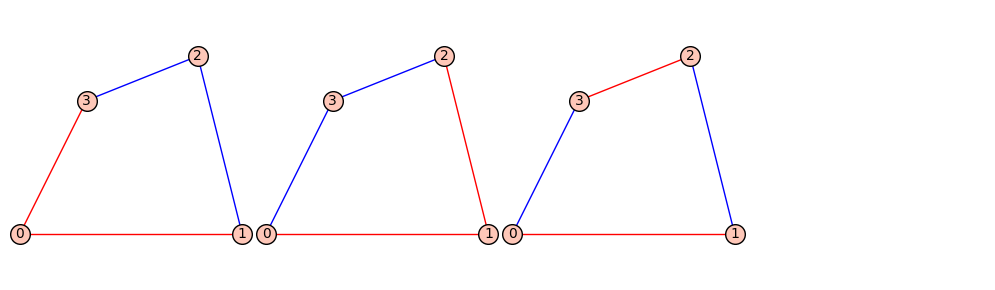

SmallestFlexibleLamanGraph


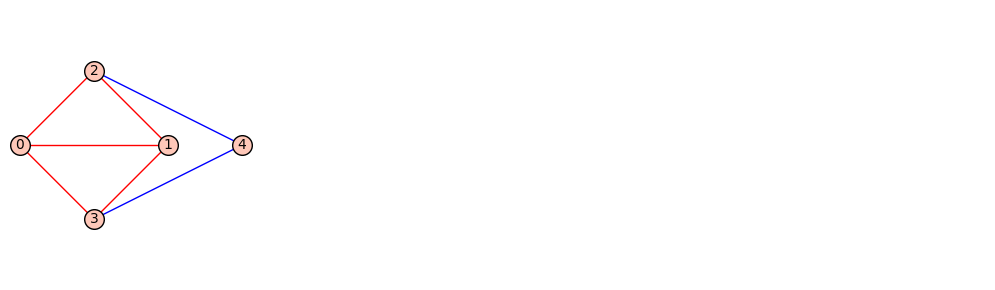

3-prism


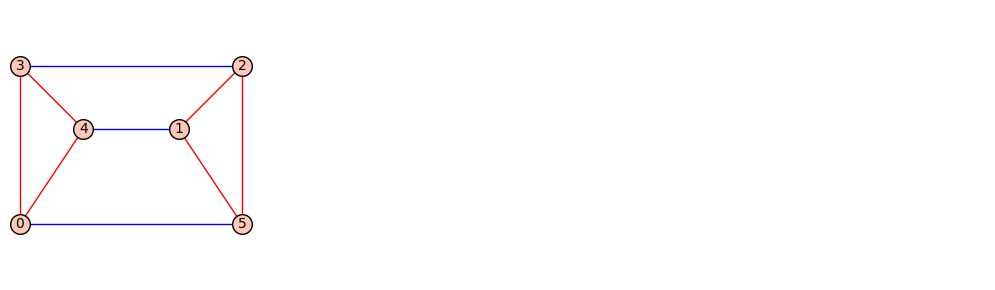

In [12]:
for G in [C4, S, T]:
    print G.name()
    graphics_array([col.plot() for col in G.NAC_colorings()], ncols=4).show(
        figsize=[10,3])

## Motion construction from a NAC-coloring

In [13]:
from flexrilog.graph_motion import GraphMotion
delta = T.NAC_colorings()[0]
motion_T = GraphMotion.GridConstruction(T, delta)
motion_T.parametrization()

{0: (0, 0),
 1: (sin(alpha) + 1, cos(alpha)),
 2: (2*sin(alpha) + 1, 2*cos(alpha)),
 3: (2*sin(alpha), 2*cos(alpha)),
 4: (sin(alpha), cos(alpha)),
 5: (1, 0)}

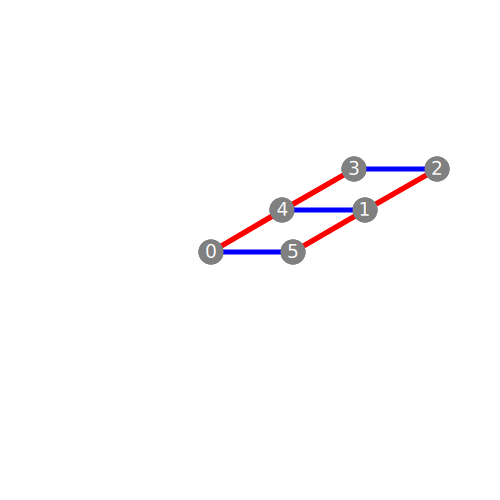

In [14]:
motion_T.animation_SVG(edge_partition=[delta.red_edges(), delta.blue_edges()], colors=['red', 'blue'])

In [15]:
motion_T = GraphMotion.GridConstruction(T, delta, zigzag=[[[0,0], [3/4,1/2], [2,0]], [[0,0], [1,0]]])
motion_T.parametrization()

{0: (0, 0),
 1: (3/4*cos(alpha) + 1/2*sin(alpha) + 1, 1/2*cos(alpha) - 3/4*sin(alpha)),
 2: (2*cos(alpha) + 1, -2*sin(alpha)),
 3: (2*cos(alpha), -2*sin(alpha)),
 4: (3/4*cos(alpha) + 1/2*sin(alpha), 1/2*cos(alpha) - 3/4*sin(alpha)),
 5: (1, 0)}

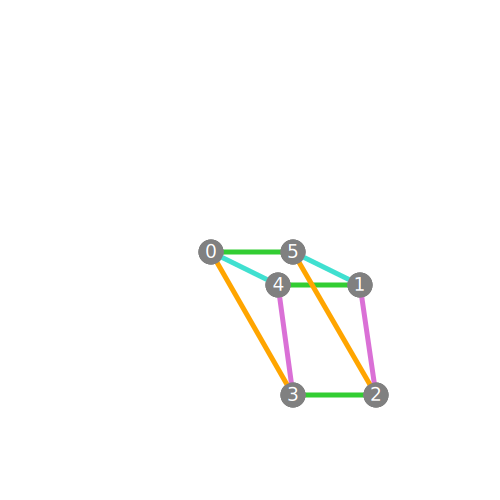

In [16]:
motion_T.animation_SVG()

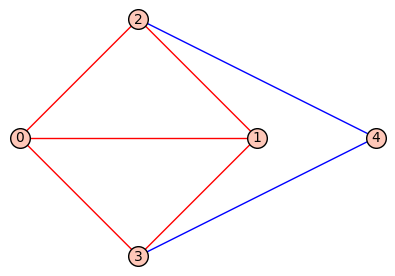

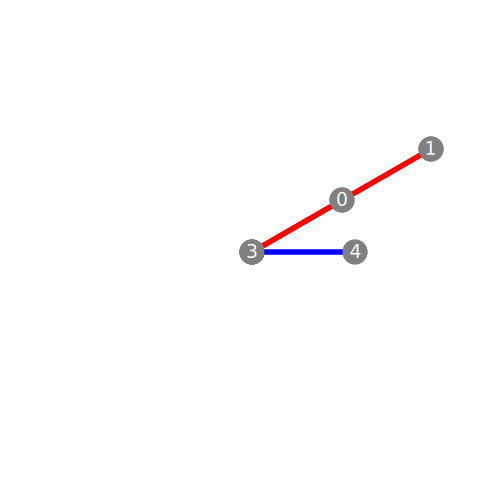

In [17]:
delta = S.NAC_colorings()[0]
delta.plot().show(figsize=[4,4])
motion_S = GraphMotion.GridConstruction(S, delta, check=False)
motion_S.animation_SVG(edge_partition=[delta.red_edges(), delta.blue_edges()], colors=['red', 'blue'])

In [18]:
table([['', 'NAC-coloring', 'injective grid'
       ]]+[[G.name(), str(G.has_NAC_coloring()), str(G.has_injective_grid_construction())] for G in examples])

,NAC-coloring,injective grid
4-cycle,True,True
SmallestFlexibleLamanGraph,True,False
3-prism,True,True
MaxEmbeddingsLamanGraph_7vert,True,False
Complete bipartite graph,True,False
No NAC,False,False
Q_1,True,False


## Movable graphs

Recall - we look for a **proper** flexible labeling, i.e., infinitely many **injective** realizations

**Definition**
$\DeclareMathOperator{\CDC}{CDC} \newcommand{\cdc}[1]{\CDC(#1)}$
$\DeclareMathOperator{\Upairs}{U} \newcommand{\upairs}[1]{\Upairs(#1)}$

Let $\upairs{G}$ denote the set of all pairs $\{u,v\}\subset V_G$ such that $uv\notin E_G$ and 
there exists a path from $u$ to $v$ which is unicolor for all NAC-colorings $\delta$ of $G$.	
If there exists a sequence of graphs $G=G_0, \dots, G_n$ such that
$G_i=(V_{G_{i-1}},E_{G_{i-1}} \cup \upairs{G_{i-1}})$ for $i\in\{1,\dots,n\}$
and $\upairs{G_n}=\emptyset$,
then the graph $G_n$ is called *the constant distance closure* of $G$, denoted by $\cdc{G}$.

**Theorem** [Grasegger, L., Schicho]

A graph $G$ is movable if and only $\cdc{G}$ is movable.

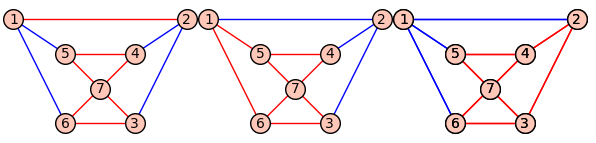

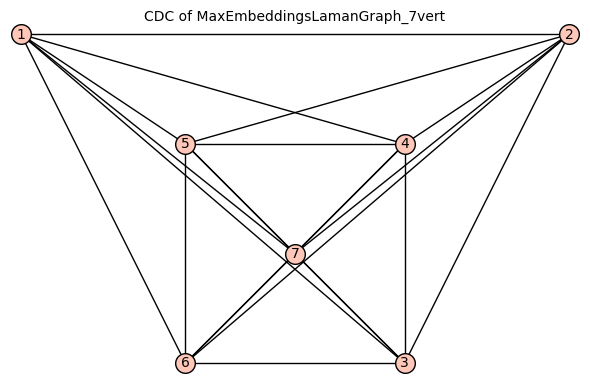

In [19]:
CDC = M.constant_distance_closure()
show(graphics_array([col.plot() for col in M.NAC_colorings()]))
CDC.plot()

**Corollary**

If $G$ is movable, then $\cdc{G}$ is not complete.

In [20]:
table([['', 'NAC-coloring', 'injective grid', 'CDC non-complete']]+
      [[G.name(), str(G.has_NAC_coloring()), 
        str(G.has_injective_grid_construction()), str(not G.cdc_is_complete())] for G in examples])

,NAC-coloring,injective grid,CDC non-complete
4-cycle,True,True,True
SmallestFlexibleLamanGraph,True,False,False
3-prism,True,True,True
MaxEmbeddingsLamanGraph_7vert,True,False,False
Complete bipartite graph,True,False,True
No NAC,False,False,False
Q_1,True,False,True


**Lemma** [Grasegger, L., Schicho]

Let $G=(V,E)$ be a graph with an injective embedding $\omega:V\rightarrow\mathbb{R}^3$ such that for every edge 
$uv\in E$, the vector $\omega(u)-\omega(v)$ is parallel to one of the four vectors $(1,0,0)$, $(0,1,0)$, $(0,0,1)$, $(-1,-1,-1)$, and all four directions are present.
Then $G$ is movable.

Moreover, there exist two NAC-colorings such that two edges are parallel in the embedding $\omega$ if and only if they
receive the same pair of colors.

True


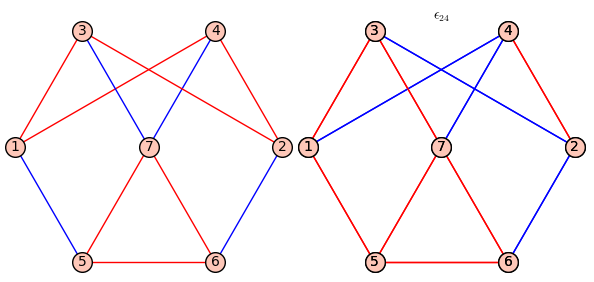

In [21]:
res, NACs = Q1.has_injective_spatial_embedding(certificate=True)
print res
graphics_array([col.plot() for col in NACs])

In [22]:
motion_Q1 = GraphMotion.SpatialEmbeddingConstruction(Q1,NACs)
motion_Q1.fix_edge([5,6])
motion_Q1.parametrization()

{1: ((6*t^2 - 6)/(2*t^2 + 2), -12*t/(2*t^2 + 2)),
 2: ((2*t^4 + 46*t^2 + 8)/(2*t^4 + 10*t^2 + 8), (12*t^3 - 24*t)/(2*t^4 + 10*t^2 + 8)),
 3: ((8*t^2 - 4)/(2*t^2 + 2), -12*t/(2*t^2 + 2)),
 4: (36*t^2/(2*t^4 + 10*t^2 + 8), (12*t^3 - 24*t)/(2*t^4 + 10*t^2 + 8)),
 5: (0, 0),
 6: (2, 0),
 7: (1, 0)}

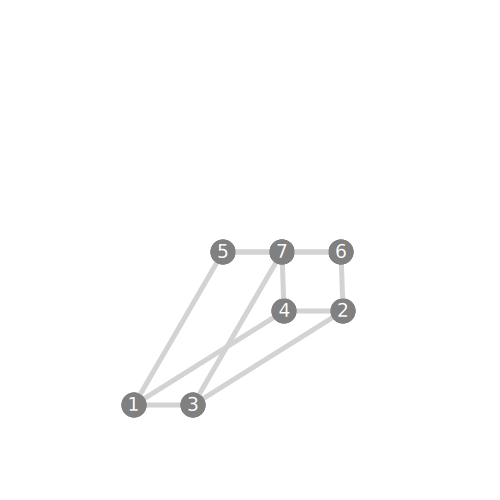

In [23]:
motion_Q1

In [24]:
table([['', 'movable', 'reason']]+
      [[G.name()]+list(G.is_movable()) for G in examples])

,movable,reason
4-cycle,yes,bipartite
SmallestFlexibleLamanGraph,no,CDC is complete
3-prism,yes,grid construction
MaxEmbeddingsLamanGraph_7vert,no,CDC is complete
Complete bipartite graph,yes,bipartite
No NAC,no,no NAC-coloring
Q_1,yes,spatial embedding


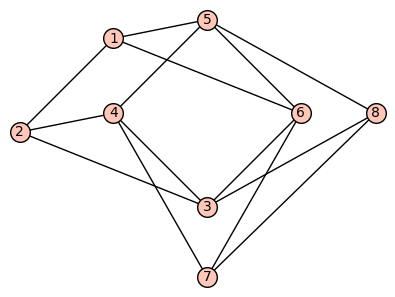

('cannot decide', '')

In [25]:
S1 = GraphGenerator.S1Graph()
show(S1)
S1.is_movable()

# Motion Classification - $K_{3,3}$

In [28]:
from flexrilog import MotionClassifier

In [29]:
G = GraphGenerator.K33Graph()
MC = MotionClassifier(G)

In [33]:
motion_classes = MC.possible_motion_types_and_active_NACs({0:'Dixon I',
                                          3: 'special case of Dixon I',
                                          7: 'special case of Dixon I',
                                          4: 'Dixon II',
                                         })

index,#,motion types,g,a,p,d,active NACs,comment
,,g g g g g g g g g,,,,,,Dixon I
,,g g g g e e o g g,,,,,,special case of Dixon I
,,g g a g a g g g p,,,,,,Dixon II
,,g g e g e e p e g,,,,,,special case of Dixon I


In [41]:
dixonII_mt = motion_classes[2][0]; dixonII_mt

{(1, 2, 3, 4): 'g',
 (1, 2, 3, 6): 'g',
 (1, 2, 5, 4): 'p',
 (1, 2, 5, 6): 'g',
 (1, 4, 3, 6): 'a',
 (1, 4, 5, 6): 'g',
 (2, 3, 4, 5): 'g',
 (2, 3, 6, 5): 'a',
 (3, 4, 5, 6): 'g'}

edge lengths enforced by motion types:

In [43]:
MC.show_factored_eqs(MC.motion_types2same_lengths_equations(dixonII_mt))

lambda1_2 - lambda4_5

lambda1_4 - lambda3_6

lambda1_6 - lambda3_4

lambda2_3 - lambda5_6

lambda2_5 - lambda3_6

active NAC-colorings:

In [46]:
active_NACs = MC.motion_types2active_NACs(dixonII_mt)

In [47]:
MC.singletons_table(active_NACs)

NAC-coloring,is singleton,is singleton w.r.t. active
omega3,,
omega6,,
epsilon45,,
epsilon12,,


equations from motion types and comparing leading coefficients:

In [48]:
MC.show_factored_eqs(MC.motion_types2equations(dixonII_mt))

(-1) * (-lambda3_4^2 + lambda3_6^2 + lambda4_5^2 - lambda5_6^2)

lambda1_2 - lambda4_5

lambda1_4 - lambda3_6

lambda1_6 - lambda3_4

lambda2_3 - lambda5_6

lambda2_5 - lambda3_6